#**CARACTERIZACIÓN, CREACIÓN DE DATASET Y LECTURA**

***IABO - Inteligencia Artificial de Borde***

Santiago Corredor

Christian Torres

#*Caracterización de las señales de la IMU*

En esta primera parte se hace una explicación de la forma de crear un dataset a partir de señales de un sensor inercial embebido en un SoC 33BLEsense desde un archivo de Excel.

Lectura de los datos de archivo de excel

Archivos generados: 
1. adelante.xlsx
2. atras.xlsx
3. izquierda.xlsx
4. derecha.xlsx
5. stop.xlsx

Clonación del repositorio donde esta el archivo de excel con las señales de la IMU

In [ ]:
!git clone https://github.com/christiantorres29/IABO

Cloning into 'IABO'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 24 (delta 1), reused 21 (delta 1), pack-reused 0
Unpacking objects: 100% (24/24), 853.34 KiB | 9.48 MiB/s, done.


Librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import xlrd
from matplotlib.pyplot import figure

In [ ]:
def lectura(archivo):
  wb=xlrd.open_workbook(archivo)
  sheet = wb.sheet_by_index(0)
  ax=sheet.col_values(0)
  ay=sheet.col_values(1)
  az=sheet.col_values(2)
  gx=sheet.col_values(3)
  gy=sheet.col_values(4)
  gz=sheet.col_values(5)
  return ax,ay,ay,gx,gy,gz

# Caracterizazión de las señales del acelerómetro y giroscopio obtenidas de la IMU mediante: #


1.   **Varianza**



Lectura de archivos

In [ ]:
AX_ad, AY_ad, AZ_ad, GX_ad, GY_ad, GZ_ad=lectura("/content/IABO/datasets/adelante.xlsx")
AX_at,AY_at,AZ_at,GX_at,GY_at,GZ_at=lectura("/content/IABO/datasets/atras.xlsx")
AX_de,AY_de,AZ_de,GX_de,GY_de,GZ_de=lectura("/content/IABO/datasets/derecha.xlsx")
AX_iz,AY_iz,AZ_iz,GX_iz,GY_iz,GZ_iz=lectura("/content/IABO/datasets/izquierda.xlsx")
AX_st,AY_st,AZ_st,GX_st,GY_st,GZ_st=lectura("/content/IABO/datasets/stop.xlsx")

Parámetros para la segmentación de la señal y su caracterización

In [ ]:
N=72                         # Número de muestras 
nV=np.array(np.shape(AX_ad)) # Número de muestras de la señal, 
segment = np.floor(nV/N)     # Número de segmetos de la señal
print("Segmentos : ",segment)

Segmentos :  [13.]


Segmentación y cálculo de la varianza de señales 

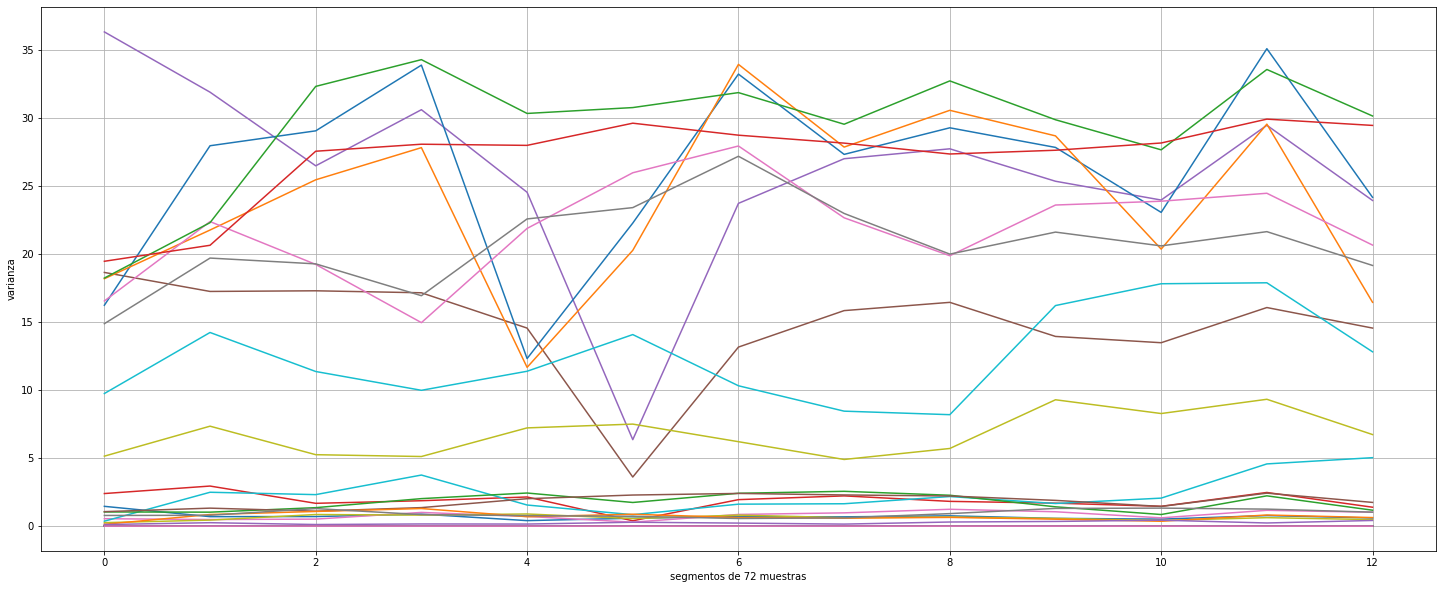

In [ ]:

#Varianzas Adelante
var_ventana_ax_ad=[]
var_ventana_ay_ad=[]
var_ventana_az_ad=[]
var_ventana_gx_ad=[]
var_ventana_gy_ad=[]
var_ventana_gz_ad=[]

#Varianzas Atras
var_ventana_ax_at=[]
var_ventana_ay_at=[]
var_ventana_az_at=[]
var_ventana_gx_at=[]
var_ventana_gy_at=[]
var_ventana_gz_at=[]

#Varianzas Derecha
var_ventana_ax_de=[]
var_ventana_ay_de=[]
var_ventana_az_de=[]
var_ventana_gx_de=[]
var_ventana_gy_de=[]
var_ventana_gz_de=[]

#Varianzas izquierda
var_ventana_ax_iz=[]
var_ventana_ay_iz=[]
var_ventana_az_iz=[]
var_ventana_gx_iz=[]
var_ventana_gy_iz=[]
var_ventana_gz_iz=[]

#Varianzas stop
var_ventana_ax_st=[]
var_ventana_ay_st=[]
var_ventana_az_st=[]
var_ventana_gx_st=[]
var_ventana_gy_st=[]
var_ventana_gz_st=[]

seg=segment[0].astype(np.uint)

for i in range (0,seg):
  
  #Varianza Adelante
  var_ventana_ax_ad.append(np.var(AX_ad[int(i*N):int((i+1)*N)]))
  var_ventana_ay_ad.append(np.var(AY_ad[int(i*N):int((i+1)*N)]))
  var_ventana_az_ad.append(np.var(AZ_ad[int(i*N):int((i+1)*N)]))
  var_ventana_gx_ad.append(np.var(GX_ad[int(i*N):int((i+1)*N)]))
  var_ventana_gy_ad.append(np.var(GY_ad[int(i*N):int((i+1)*N)]))
  var_ventana_gz_ad.append(np.var(GZ_ad[int(i*N):int((i+1)*N)]))

  #Varianza Atras
  var_ventana_ax_at.append(np.var(AX_at[int(i*N):int((i+1)*N)]))
  var_ventana_ay_at.append(np.var(AY_at[int(i*N):int((i+1)*N)]))
  var_ventana_az_at.append(np.var(AZ_at[int(i*N):int((i+1)*N)]))
  var_ventana_gx_at.append(np.var(GX_at[int(i*N):int((i+1)*N)]))
  var_ventana_gy_at.append(np.var(GY_at[int(i*N):int((i+1)*N)]))
  var_ventana_gz_at.append(np.var(GZ_at[int(i*N):int((i+1)*N)]))

  #Varianza Izquierda
  var_ventana_ax_de.append(np.var(AX_de[int(i*N):int((i+1)*N)]))
  var_ventana_ay_de.append(np.var(AY_de[int(i*N):int((i+1)*N)]))
  var_ventana_az_de.append(np.var(AZ_de[int(i*N):int((i+1)*N)]))
  var_ventana_gx_de.append(np.var(GX_de[int(i*N):int((i+1)*N)]))
  var_ventana_gy_de.append(np.var(GY_de[int(i*N):int((i+1)*N)]))
  var_ventana_gz_de.append(np.var(GZ_de[int(i*N):int((i+1)*N)]))

  #Varianza Derecha
  var_ventana_ax_iz.append(np.var(AX_iz[int(i*N):int((i+1)*N)]))
  var_ventana_ay_iz.append(np.var(AY_iz[int(i*N):int((i+1)*N)]))
  var_ventana_az_iz.append(np.var(AZ_iz[int(i*N):int((i+1)*N)]))
  var_ventana_gx_iz.append(np.var(GX_iz[int(i*N):int((i+1)*N)]))
  var_ventana_gy_iz.append(np.var(GY_iz[int(i*N):int((i+1)*N)]))
  var_ventana_gz_iz.append(np.var(GZ_iz[int(i*N):int((i+1)*N)]))

  #Varianza Stop
  var_ventana_ax_st.append(np.var(AX_st[int(i*N):int((i+1)*N)]))
  var_ventana_ay_st.append(np.var(AY_st[int(i*N):int((i+1)*N)]))
  var_ventana_az_st.append(np.var(AZ_st[int(i*N):int((i+1)*N)]))
  var_ventana_gx_st.append(np.var(GX_st[int(i*N):int((i+1)*N)]))
  var_ventana_gy_st.append(np.var(GY_st[int(i*N):int((i+1)*N)]))
  var_ventana_gz_st.append(np.var(GZ_st[int(i*N):int((i+1)*N)]))


plt.figure(figsize=(25,10))

#Solo visualización
plt.plot(var_ventana_ax_ad)
plt.plot(var_ventana_ay_ad)
plt.plot(var_ventana_az_ad)
plt.plot(var_ventana_gx_ad)
plt.plot(var_ventana_gy_ad)
plt.plot(var_ventana_gz_ad)

plt.plot(var_ventana_ax_at)
plt.plot(var_ventana_ay_at)
plt.plot(var_ventana_az_at)
plt.plot(var_ventana_gx_at)
plt.plot(var_ventana_gy_at)
plt.plot(var_ventana_gz_at)

plt.plot(var_ventana_ax_de)
plt.plot(var_ventana_ay_de)
plt.plot(var_ventana_az_de)
plt.plot(var_ventana_gx_de)
plt.plot(var_ventana_gy_de)
plt.plot(var_ventana_gz_de)

plt.plot(var_ventana_ax_iz)
plt.plot(var_ventana_ay_iz)
plt.plot(var_ventana_az_iz)
plt.plot(var_ventana_gx_iz)
plt.plot(var_ventana_gy_iz)
plt.plot(var_ventana_gz_iz)

plt.plot(var_ventana_ax_st)
plt.plot(var_ventana_ay_st)
plt.plot(var_ventana_az_st)
plt.plot(var_ventana_gx_st)
plt.plot(var_ventana_gy_st)
plt.plot(var_ventana_gz_st)


plt.xlabel("segmentos de " + str(N)+" muestras")
plt.ylabel("varianza")
plt.grid()

# Graficas de las varianzas 

Comparación de las varianzas.

Text(0.5, 1.0, 'varianza gz stop')

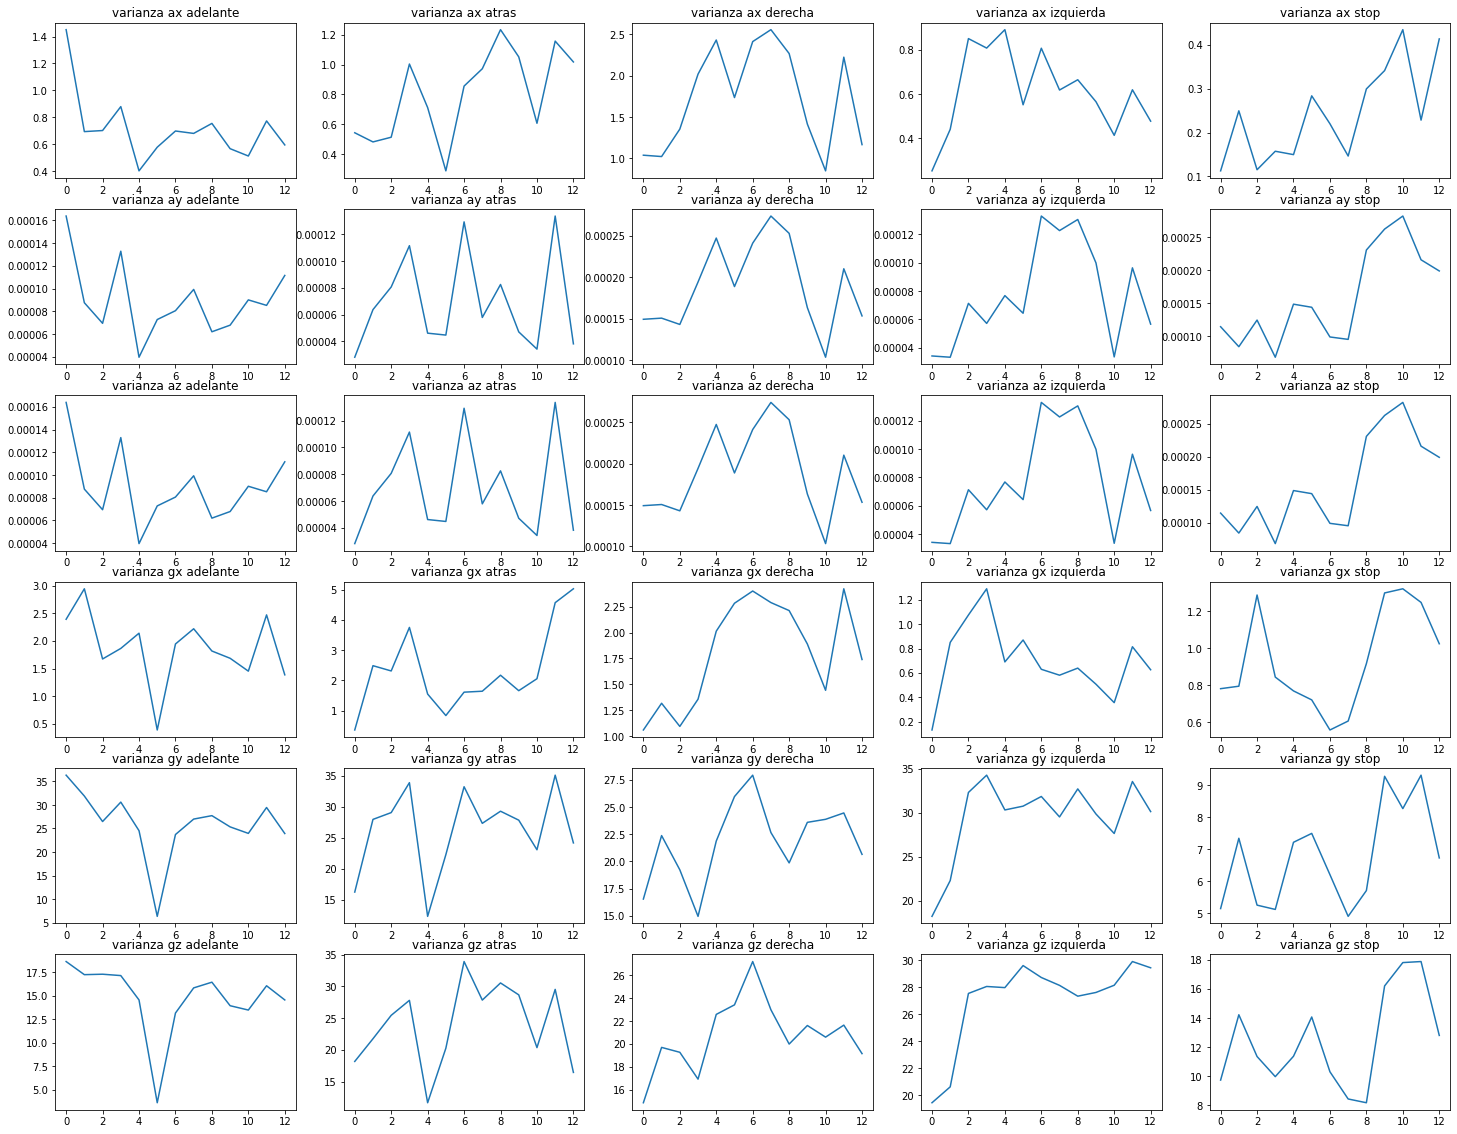

In [34]:
plt.figure(figsize=(25,20))

#Varianzas adelante
plt.subplot(651)
plt.plot(var_ventana_ax_ad)
plt.title("varianza ax adelante")
plt.subplot(656)
plt.plot(var_ventana_ay_ad)
plt.title("varianza ay adelante")
plt.subplot(6,5,11)
plt.plot(var_ventana_az_ad)
plt.title("varianza az adelante")
plt.subplot(6,5,16)
plt.plot(var_ventana_gx_ad)
plt.title("varianza gx adelante")
plt.subplot(6,5,21)
plt.plot(var_ventana_gy_ad)
plt.title("varianza gy adelante")
plt.subplot(6,5,26)
plt.plot(var_ventana_gz_ad)
plt.title("varianza gz adelante")

#Varianzas atras
plt.subplot(652)
plt.plot(var_ventana_ax_at)
plt.title("varianza ax atras")
plt.subplot(657)
plt.plot(var_ventana_ay_at)
plt.title("varianza ay atras")
plt.subplot(6,5,12)
plt.plot(var_ventana_az_at)
plt.title("varianza az atras")
plt.subplot(6,5,17)
plt.plot(var_ventana_gx_at)
plt.title("varianza gx atras")
plt.subplot(6,5,22)
plt.plot(var_ventana_gy_at)
plt.title("varianza gy atras")
plt.subplot(6,5,27)
plt.plot(var_ventana_gz_at)
plt.title("varianza gz atras")

#Varianzas derecha
plt.subplot(653)
plt.plot(var_ventana_ax_de)
plt.title("varianza ax derecha")
plt.subplot(658)
plt.plot(var_ventana_ay_de)
plt.title("varianza ay derecha")
plt.subplot(6,5,13)
plt.plot(var_ventana_az_de)
plt.title("varianza az derecha")
plt.subplot(6,5,18)
plt.plot(var_ventana_gx_de)
plt.title("varianza gx derecha")
plt.subplot(6,5,23)
plt.plot(var_ventana_gy_de)
plt.title("varianza gy derecha")
plt.subplot(6,5,28)
plt.plot(var_ventana_gz_de)
plt.title("varianza gz derecha")

#Varianzas izquierda
plt.subplot(654)
plt.plot(var_ventana_ax_iz)
plt.title("varianza ax izquierda")
plt.subplot(659)
plt.plot(var_ventana_ay_iz)
plt.title("varianza ay izquierda")
plt.subplot(6,5,14)
plt.plot(var_ventana_az_iz)
plt.title("varianza az izquierda")
plt.subplot(6,5,19)
plt.plot(var_ventana_gx_iz)
plt.title("varianza gx izquierda")
plt.subplot(6,5,24)
plt.plot(var_ventana_gy_iz)
plt.title("varianza gy izquierda")
plt.subplot(6,5,29)
plt.plot(var_ventana_gz_iz)
plt.title("varianza gz izquierda")

#Varianzas stop
plt.subplot(655)
plt.plot(var_ventana_ax_st)
plt.title("varianza ax stop")
plt.subplot(6,5,10)
plt.plot(var_ventana_ay_st)
plt.title("varianza ay stop")
plt.subplot(6,5,15)
plt.plot(var_ventana_az_st)
plt.title("varianza az stop")
plt.subplot(6,5,20)
plt.plot(var_ventana_gx_st)
plt.title("varianza gx stop")
plt.subplot(6,5,25)
plt.plot(var_ventana_gy_st)
plt.title("varianza gy stop")
plt.subplot(6,5,30)
plt.plot(var_ventana_gz_st)
plt.title("varianza gz stop")

Creación de los vectores de características

In [35]:
N=np.size(var_ventana_ay_ad)
clases=[]
clasePI=[]
for n in range(N):
  clases.append('Adelante')
  clasePI.append(0)
N=np.size(var_ventana_ay_at)
for n in range(N):
  clases.append('Atras')
N=np.size(var_ventana_ay_de)
for n in range(N):
  clases.append('Derecha')
N=np.size(var_ventana_ay_iz)
for n in range(N):
  clases.append('Izquierda')
N=np.size(var_ventana_ay_st)
for n in range(N):
  clases.append('Stop')

clases=np.transpose(clases)
print(clases)

['Adelante' 'Adelante' 'Adelante' 'Adelante' 'Adelante' 'Adelante'
 'Adelante' 'Adelante' 'Adelante' 'Adelante' 'Adelante' 'Adelante'
 'Adelante' 'Atras' 'Atras' 'Atras' 'Atras' 'Atras' 'Atras' 'Atras'
 'Atras' 'Atras' 'Atras' 'Atras' 'Atras' 'Atras' 'Derecha' 'Derecha'
 'Derecha' 'Derecha' 'Derecha' 'Derecha' 'Derecha' 'Derecha' 'Derecha'
 'Derecha' 'Derecha' 'Derecha' 'Derecha' 'Izquierda' 'Izquierda'
 'Izquierda' 'Izquierda' 'Izquierda' 'Izquierda' 'Izquierda' 'Izquierda'
 'Izquierda' 'Izquierda' 'Izquierda' 'Izquierda' 'Izquierda' 'Stop' 'Stop'
 'Stop' 'Stop' 'Stop' 'Stop' 'Stop' 'Stop' 'Stop' 'Stop' 'Stop' 'Stop'
 'Stop']


#**Creación de Dataset**

Teniendo las características anteriores se crea el Dataset  a partir de un Dataframe

In [36]:
# Unión de las dos características anteriores
caracteristica0 = var_ventana_ax_ad + var_ventana_ax_at + var_ventana_ax_de + var_ventana_ax_iz + var_ventana_ax_st 
caracteristica1 = var_ventana_ay_ad + var_ventana_ay_at + var_ventana_ay_de + var_ventana_ay_iz + var_ventana_ay_st 
caracteristica2 = var_ventana_az_ad + var_ventana_az_at + var_ventana_az_de + var_ventana_az_iz + var_ventana_az_st 
caracteristica3 = var_ventana_gx_ad + var_ventana_gx_at + var_ventana_gx_de + var_ventana_gx_iz + var_ventana_gx_st 
caracteristica4 = var_ventana_gy_ad + var_ventana_gy_at + var_ventana_gy_de + var_ventana_gy_iz + var_ventana_gy_st 
caracteristica5 = var_ventana_gz_ad + var_ventana_gz_at + var_ventana_gz_de + var_ventana_gz_iz + var_ventana_gz_st 

caracteristicas=[caracteristica0, caracteristica1, caracteristica2, caracteristica3, caracteristica4, caracteristica5]
caracteristicas=np.array(np.transpose(caracteristicas))

Creación de archivo de Excel con las características y clases

In [40]:
# Creación del DataFrame
import pandas as pd

datos={'Varianza_aX': caracteristica0,
       'Varianza_aY': caracteristica1,
       'Varianza_aZ': caracteristica2,
       'Aceleracion_aX': caracteristica3,
       'Aceleracion_aY': caracteristica4,
       'Aceleracion_aZ': caracteristica5,
       'gesto':clases}

datosDF=pd.DataFrame(datos)
print(datosDF)

    Varianza_aX  Varianza_aY  Varianza_aZ  Aceleracion_aX  Aceleracion_aY  \
0      1.451187     0.000164     0.000164        2.390865       36.308728   
1      0.693278     0.000087     0.000087        2.941587       31.880325   
2      0.701244     0.000069     0.000069        1.673028       26.471185   
3      0.879042     0.000133     0.000133        1.863984       30.592669   
4      0.401504     0.000039     0.000039        2.139061       24.526779   
..          ...          ...          ...             ...             ...   
60     0.299371     0.000231     0.000231        0.916138        5.702607   
61     0.341188     0.000262     0.000262        1.298159        9.281393   
62     0.434490     0.000282     0.000282        1.320651        8.269770   
63     0.228288     0.000216     0.000216        1.247076        9.317187   
64     0.413407     0.000199     0.000199        1.023590        6.724996   

    Aceleracion_aZ     gesto  
0        18.636500  Adelante  
1        17.2

In [41]:
#Creación del archivo de Excel
datosDF.to_excel("caracteristicas.xlsx")

In [42]:
#!rm -rf '/content/IABO'